<a href="https://colab.research.google.com/github/Diljuu/Netflix-Originals/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Original Films & IMDB Scores**

# **Loading Data**

In [1]:
# importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix = pd.read_csv('/content/drive/MyDrive/PROJECT/NetflixOriginals.csv', encoding = "ISO-8859-1", engine='python')
netflix

# This dataset consists of all Netflix original films released as of June 1st, 2021. It  also includes all Netflix documentaries and specials.

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


# **Data Analysis**

In [3]:
netflix = pd.read_csv('/content/drive/MyDrive/PROJECT/NetflixOriginals.csv', encoding = "ISO-8859-1", engine='python')
netflix.head()  # gives first 5 rows

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
netflix.tail()  # gives last 5 rows

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


In [5]:
netflix.shape  # gives number of rows and columns

(584, 6)

In [6]:
netflix.info()  # gives the summary of the dataframe.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [7]:
netflix.describe() # gives basic statistical details

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [8]:
netflix.isnull()  # shows the missing values

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
579,False,False,False,False,False,False
580,False,False,False,False,False,False
581,False,False,False,False,False,False
582,False,False,False,False,False,False


In [9]:
netflix.isnull().sum()  # gives the number of missing values

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [10]:
#Converting Premiere column to datetime format for easy analysis
netflix['Premiere'] = pd.to_datetime(netflix['Premiere'])

In [11]:
#Checking the month from Premiere
months = netflix['Premiere'].apply(lambda x:x.month)
months

0       8
1       8
2      12
3       1
4      10
       ..
579    12
580    10
581    12
582    12
583    10
Name: Premiere, Length: 584, dtype: int64

In [12]:
#Checking days from Premiere
days = netflix['Premiere'].apply(lambda x:x.day)
days

0       5
1      21
2      26
3      19
4      30
       ..
579    31
580     9
581    16
582     8
583     4
Name: Premiere, Length: 584, dtype: int64

In [13]:
#Checking the years from Premiere
years = netflix['Premiere'].apply(lambda x:x.year)
years

0      2019
1      2020
2      2019
3      2018
4      2020
       ... 
579    2018
580    2015
581    2018
582    2020
583    2020
Name: Premiere, Length: 584, dtype: int64

In [14]:
#Now Adding days,months and years in dataframe
netflix['Day'] = days
netflix['Month'] = months
netflix['Year'] = years

In [15]:
netflix.head(5)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Day,Month,Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,5,8,2019
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,21,8,2020
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,26,12,2019
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,19,1,2018
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,30,10,2020


# **Data Visualization**

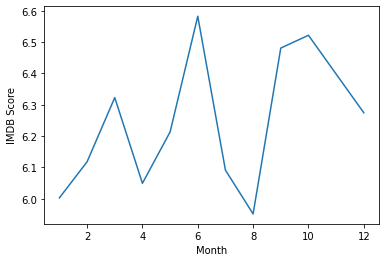

In [16]:
# Lineplot
sns.lineplot(x='Month',y='IMDB Score',data=netflix,ci=None)

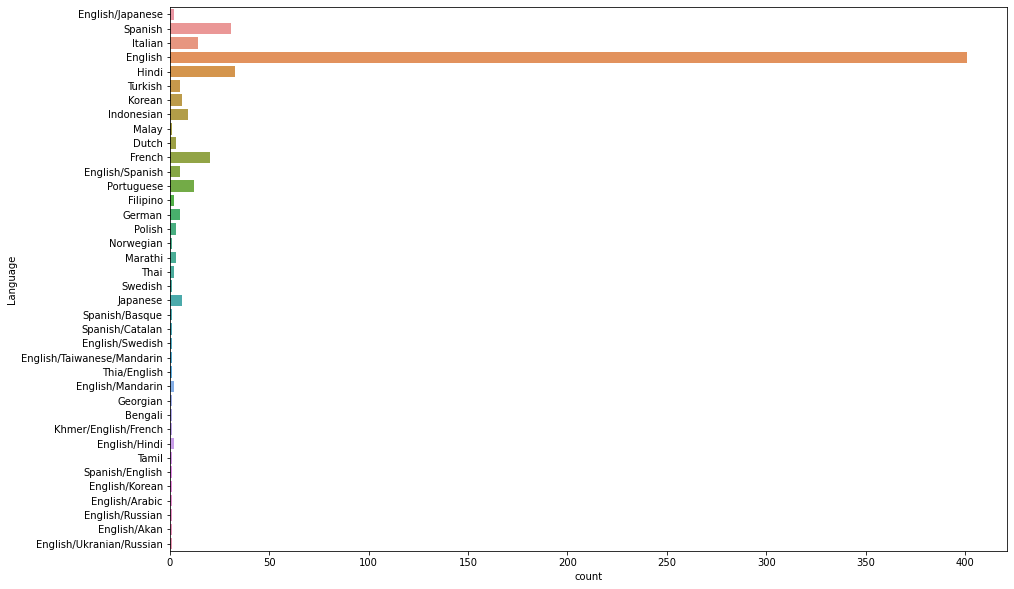

In [17]:
# Barplot
plt.figure(figsize=(15,10))
sns.countplot(y = 'Language',data=netflix)
plt.show()

Text(0.5, 1.0, 'No. of Movies by Year')

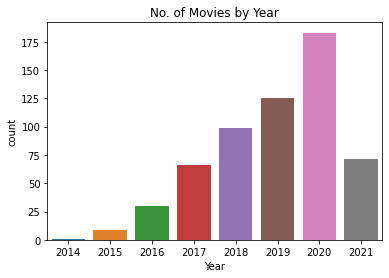

In [18]:
# Countplot
sns.countplot(x='Year',data=netflix)
plt.title('No. of Movies by Year')

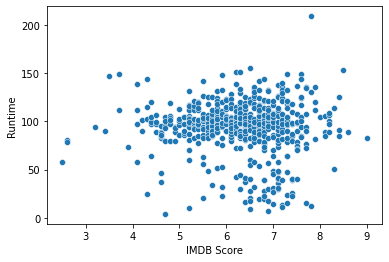

In [19]:
# scatterplot
sns.scatterplot(x='IMDB Score',y='Runtime',data=netflix)

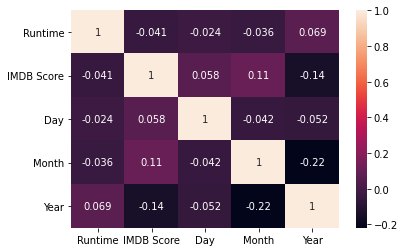

In [20]:
# Heatmap
sns.heatmap(netflix.corr(),annot=True)

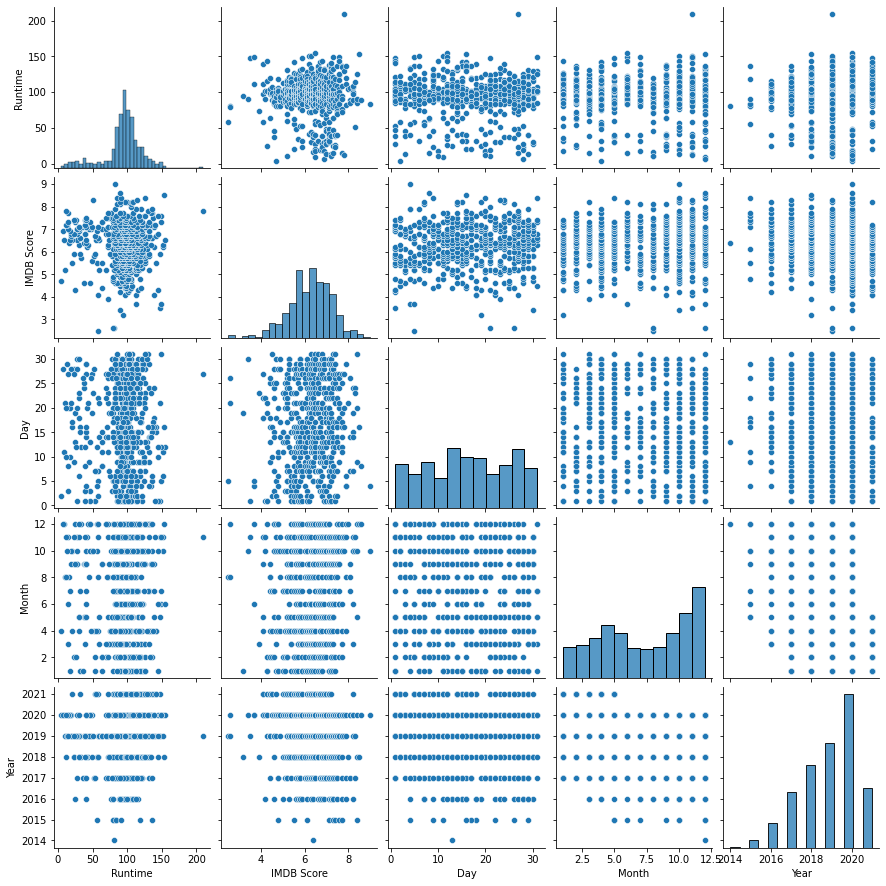

In [21]:
# Pairplot
sns.pairplot(netflix)      

In [22]:
genre_high = netflix[netflix['IMDB Score']>8][['Genre']]

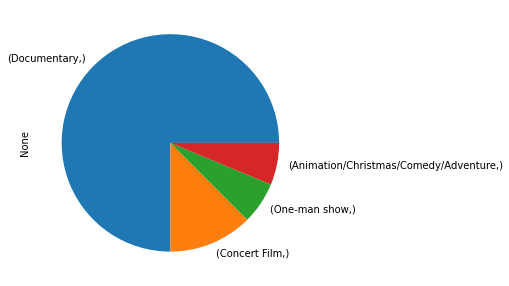

In [23]:
plt.figure(figsize = (8,5))
genre_high.value_counts().plot(kind='pie')